                                    NEXT WORD PREDICTION USING LSTM RNN                                                 

Preparation of Data. Extracting the Text column from the dataset

In [80]:
import pandas as pd

In [81]:
df=pd.read_csv('train1.csv')

In [82]:
df.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [83]:
df.text[0]

'House Dem Aide: We Didn’t Even See Comey’s Letter Until Jason Chaffetz Tweeted It By Darrell Lucus on October 30, 2016 Subscribe Jason Chaffetz on the stump in American Fork, Utah ( image courtesy Michael Jolley, available under a Creative Commons-BY license) \nWith apologies to Keith Olbermann, there is no doubt who the Worst Person in The World is this week–FBI Director James Comey. But according to a House Democratic aide, it looks like we also know who the second-worst person is as well. It turns out that when Comey sent his now-infamous letter announcing that the FBI was looking into emails that may be related to Hillary Clinton’s email server, the ranking Democrats on the relevant committees didn’t hear about it from Comey. They found out via a tweet from one of the Republican committee chairmen. \nAs we now know, Comey notified the Republican chairmen and Democratic ranking members of the House Intelligence, Judiciary, and Oversight committees that his agency was reviewing emai

In [84]:
df.isnull().sum()

id           0
title      558
author    1957
text        39
label        0
dtype: int64

In [85]:
df.shape

(20800, 5)

Droping NULL values

In [86]:
df.dropna(inplace=True)

In [87]:
text=list(df.text.values)
joined_text=" ".join(text)

In [88]:
len(joined_text)

87789607

Taking a part of the Text to train,because of less computation time

In [89]:
final_text=joined_text[:10000]

In [90]:
import tensorflow as tf
print("TensorFlow version:", tf.__version__)
import tensorflow.keras as keras
print("Keras version:", keras.__version__)


TensorFlow version: 2.18.0
Keras version: 3.7.0


In [91]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer

Convert text data into tokens

In [92]:
tokenizer = Tokenizer()

In [93]:
tokenizer.fit_on_texts([final_text])

In [94]:
tokenizer.word_index

{'the': 1,
 'of': 2,
 'a': 3,
 'to': 4,
 'in': 5,
 'that': 6,
 'and': 7,
 'on': 8,
 'it': 9,
 'is': 10,
 'for': 11,
 'her': 12,
 'as': 13,
 'was': 14,
 'about': 15,
 'chaffetz': 16,
 '”': 17,
 'this': 18,
 'she': 19,
 'who': 20,
 'know': 21,
 'out': 22,
 'his': 23,
 'republican': 24,
 'even': 25,
 'what': 26,
 'house': 27,
 'we': 28,
 'letter': 29,
 'with': 30,
 'comey': 31,
 'but': 32,
 'democratic': 33,
 'when': 34,
 'from': 35,
 'not': 36,
 'after': 37,
 'he': 38,
 'didn’t': 39,
 'now': 40,
 'has': 41,
 '—': 42,
 'them': 43,
 'other': 44,
 'so': 45,
 'him': 46,
 'those': 47,
 'you': 48,
 'clinton': 49,
 'aide': 50,
 'jason': 51,
 'by': 52,
 'darrell': 53,
 '2016': 54,
 'there': 55,
 'like': 56,
 'fbi': 57,
 'emails': 58,
 'may': 59,
 'be': 60,
 'hillary': 61,
 'ranking': 62,
 'have': 63,
 'i': 64,
 'people': 65,
 'worst': 66,
 'into': 67,
 'they': 68,
 'committee': 69,
 'chairmen': 70,
 'if': 71,
 'long': 72,
 'an': 73,
 'been': 74,
 'at': 75,
 'all': 76,
 'way': 77,
 'woman': 78,
 

In [95]:
len(tokenizer.word_index)

740

In [96]:
final_text

'House Dem Aide: We Didn’t Even See Comey’s Letter Until Jason Chaffetz Tweeted It By Darrell Lucus on October 30, 2016 Subscribe Jason Chaffetz on the stump in American Fork, Utah ( image courtesy Michael Jolley, available under a Creative Commons-BY license) \nWith apologies to Keith Olbermann, there is no doubt who the Worst Person in The World is this week–FBI Director James Comey. But according to a House Democratic aide, it looks like we also know who the second-worst person is as well. It turns out that when Comey sent his now-infamous letter announcing that the FBI was looking into emails that may be related to Hillary Clinton’s email server, the ranking Democrats on the relevant committees didn’t hear about it from Comey. They found out via a tweet from one of the Republican committee chairmen. \nAs we now know, Comey notified the Republican chairmen and Democratic ranking members of the House Intelligence, Judiciary, and Oversight committees that his agency was reviewing emai

In [97]:
final_text.split('\n')

['House Dem Aide: We Didn’t Even See Comey’s Letter Until Jason Chaffetz Tweeted It By Darrell Lucus on October 30, 2016 Subscribe Jason Chaffetz on the stump in American Fork, Utah ( image courtesy Michael Jolley, available under a Creative Commons-BY license) ',
 'With apologies to Keith Olbermann, there is no doubt who the Worst Person in The World is this week–FBI Director James Comey. But according to a House Democratic aide, it looks like we also know who the second-worst person is as well. It turns out that when Comey sent his now-infamous letter announcing that the FBI was looking into emails that may be related to Hillary Clinton’s email server, the ranking Democrats on the relevant committees didn’t hear about it from Comey. They found out via a tweet from one of the Republican committee chairmen. ',
 'As we now know, Comey notified the Republican chairmen and Democratic ranking members of the House Intelligence, Judiciary, and Oversight committees that his agency was reviewi

In [98]:
input_sequences = []
for sentence in final_text.split('\n'):
  tokenized_sentence = tokenizer.texts_to_sequences([sentence])[0]

  for i in range(1,len(tokenized_sentence)):
    input_sequences.append(tokenized_sentence[:i+1])

In [99]:
input_sequences

[[27, 128],
 [27, 128, 50],
 [27, 128, 50, 28],
 [27, 128, 50, 28, 39],
 [27, 128, 50, 28, 39, 25],
 [27, 128, 50, 28, 39, 25, 81],
 [27, 128, 50, 28, 39, 25, 81, 82],
 [27, 128, 50, 28, 39, 25, 81, 82, 29],
 [27, 128, 50, 28, 39, 25, 81, 82, 29, 83],
 [27, 128, 50, 28, 39, 25, 81, 82, 29, 83, 51],
 [27, 128, 50, 28, 39, 25, 81, 82, 29, 83, 51, 16],
 [27, 128, 50, 28, 39, 25, 81, 82, 29, 83, 51, 16, 129],
 [27, 128, 50, 28, 39, 25, 81, 82, 29, 83, 51, 16, 129, 9],
 [27, 128, 50, 28, 39, 25, 81, 82, 29, 83, 51, 16, 129, 9, 52],
 [27, 128, 50, 28, 39, 25, 81, 82, 29, 83, 51, 16, 129, 9, 52, 53],
 [27, 128, 50, 28, 39, 25, 81, 82, 29, 83, 51, 16, 129, 9, 52, 53, 130],
 [27, 128, 50, 28, 39, 25, 81, 82, 29, 83, 51, 16, 129, 9, 52, 53, 130, 8],
 [27, 128, 50, 28, 39, 25, 81, 82, 29, 83, 51, 16, 129, 9, 52, 53, 130, 8, 84],
 [27,
  128,
  50,
  28,
  39,
  25,
  81,
  82,
  29,
  83,
  51,
  16,
  129,
  9,
  52,
  53,
  130,
  8,
  84,
  131],
 [27,
  128,
  50,
  28,
  39,
  25,
  81,
  82

In [100]:
max_len = max([len(x) for x in input_sequences])

In [101]:
max_len

838

Ensure all sequences have the same length, to feed LSTM RNN

In [102]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
padded_input_sequences = pad_sequences(input_sequences, maxlen = max_len, padding='pre')

In [103]:
padded_input_sequences

array([[  0,   0,   0, ...,   0,  27, 128],
       [  0,   0,   0, ...,  27, 128,  50],
       [  0,   0,   0, ..., 128,  50,  28],
       ...,
       [  0,   0,   0, ..., 738, 739,   5],
       [  0,   0,   0, ..., 739,   5,   1],
       [  0,   0,   0, ...,   5,   1, 740]], dtype=int32)

In [104]:
X = padded_input_sequences[:,:-1]

In [105]:
X

array([[  0,   0,   0, ...,   0,   0,  27],
       [  0,   0,   0, ...,   0,  27, 128],
       [  0,   0,   0, ...,  27, 128,  50],
       ...,
       [  0,   0,   0, ...,  11, 738, 739],
       [  0,   0,   0, ..., 738, 739,   5],
       [  0,   0,   0, ..., 739,   5,   1]], dtype=int32)

In [106]:
y = padded_input_sequences[:,-1]

In [107]:
X.shape

(1679, 837)

In [108]:
y.shape

(1679,)

In [109]:
from tensorflow.keras.utils import to_categorical
y = to_categorical(y,num_classes=741)

In [110]:
y.shape

(1679, 741)

In [111]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense

In [112]:
import tensorflow as tf

with tf.device('/device:GPU:0'):
    model = tf.keras.Sequential([
        tf.keras.layers.Embedding(741, 100, input_length=837),
        tf.keras.layers.LSTM(150, return_sequences=True),
        tf.keras.layers.LSTM(150),
        tf.keras.layers.Dense(741, activation='softmax')
    ])

e:\Btech(H) CS\Projects\Genai-Projects\myenv\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [113]:
model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])

In [114]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_4 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_5 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history=model.fit(X,y,epochs=100)

Epoch 1/100
53/53 ━━━━━━━━━━━━━━━━━━━━ 106s 2s/step - accuracy: 0.0432 - loss: 6.4578
Epoch 2/100
53/53 ━━━━━━━━━━━━━━━━━━━━ 181s 3s/step - accuracy: 0.0618 - loss: 5.9880
Epoch 3/100
53/53 ━━━━━━━━━━━━━━━━━━━━ 145s 3s/step - accuracy: 0.0689 - loss: 5.8893
Epoch 4/100
53/53 ━━━━━━━━━━━━━━━━━━━━ 204s 3s/step - accuracy: 0.0614 - loss: 5.9391
Epoch 5/100
53/53 ━━━━━━━━━━━━━━━━━━━━ 203s 3s/step - accuracy: 0.0691 - loss: 5.8574
Epoch 6/100
53/53 ━━━━━━━━━━━━━━━━━━━━ 204s 3s/step - accuracy: 0.0615 - loss: 5.7872
Epoch 7/100
53/53 ━━━━━━━━━━━━━━━━━━━━ 201s 3s/step - accuracy: 0.0569 - loss: 5.6473
Epoch 8/100
53/53 ━━━━━━━━━━━━━━━━━━━━ 150s 3s/step - accuracy: 0.0773 - loss: 5.4738
Epoch 9/100
53/53 ━━━━━━━━━━━━━━━━━━━━ 201s 3s/step - accuracy: 0.0708 - loss: 5.4416
Epoch 10/100
53/53 ━━━━━━━━━━━━━━━━━━━━ 201s 3s/step - accuracy: 0.0771 - loss: 5.2778
Epoch 11/100
53/53 ━━━━━━━━━━━━━━━━━━━━ 203s 3s/step - accuracy: 0.0750 - loss: 5.2103
Epoch 12/100
53/53 ━━━━━━━━━━━━━━━━━━━━ 143s 2s/step

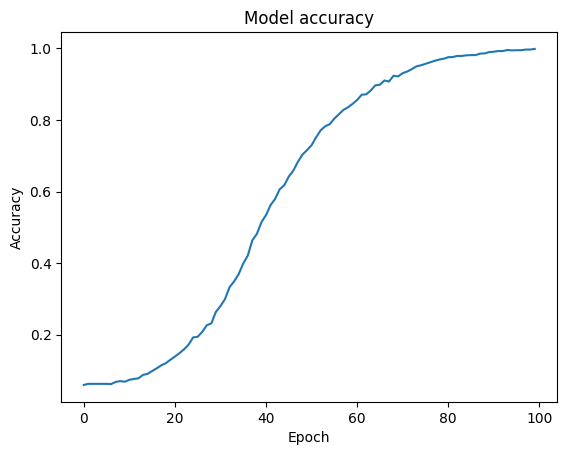

In [118]:
import matplotlib.pyplot as plt
# Plot training history
plt.plot(history.history['accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
# plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

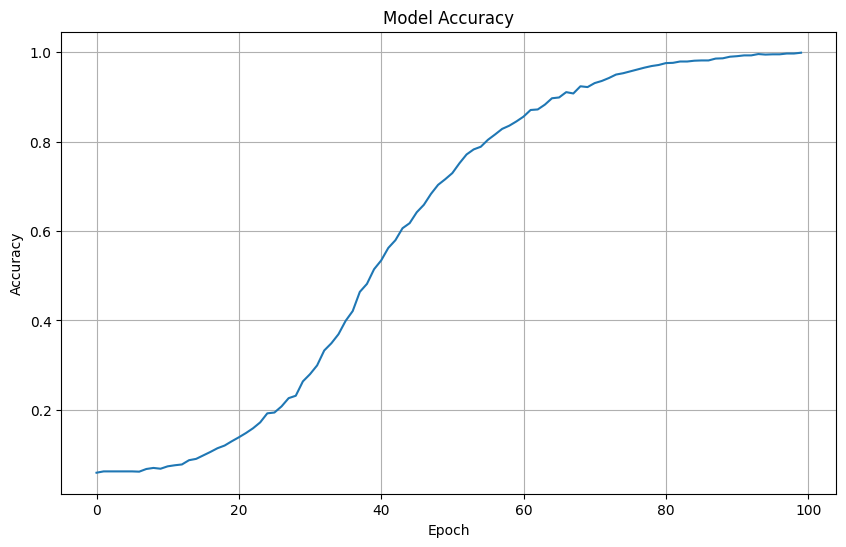

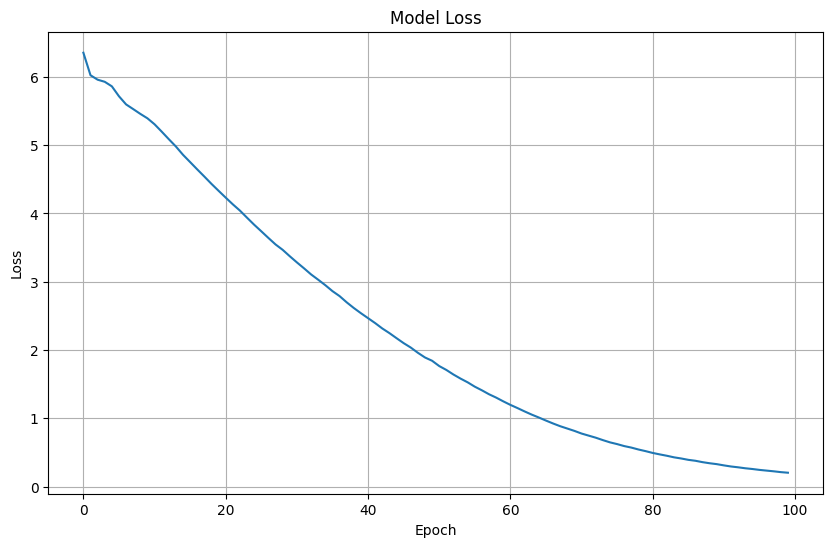

In [120]:
import matplotlib.pyplot as plt

# Assuming you have loaded the history (from saved file or training)
# Plot training accuracy
plt.figure(figsize=(10, 6))  # Adjust figure size as needed
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()

# Plot training loss
plt.figure(figsize=(10, 6))  # Maintain consistent figure size
plt.plot(history.history['loss'], label='Training Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.show()

In [36]:
from tensorflow.keras.models import load_model
model = load_model('Final_LSTM_Model.keras')

In [63]:
import numpy as np
import time
text = "What"

for i in range(20):
  # tokenize
  token_text = tokenizer.texts_to_sequences([text])[0]
  # padding
  padded_token_text = pad_sequences([token_text], maxlen=837, padding='pre')
  # predict
  pos = np.argmax(model.predict(padded_token_text))

  for word,index in tokenizer.word_index.items():
    if index == pos:
      text = text + " " + word
      # time.sleep(2)
print(text)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 301ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
What it does suggest however is that chaffetz is acting in a way that makes dan burton and darrell issa look


In [39]:
import numpy as np
import time
Actual="""The tension between intelligence analysts and political policymakers
has always been between honest assessments and desired results, with the latter
often overwhelming the former, as in the Iraq War, writes Lawrence Davidson. ',""" 
text = "The tension"

for i in range(15):
  # tokenize
  token_text = tokenizer.texts_to_sequences([text])[0]
  # padding
  padded_token_text = pad_sequences([token_text], maxlen=837, padding='pre')
  # predict
  pos = np.argmax(model.predict(padded_token_text))

  for word,index in tokenizer.word_index.items():
    if index == pos:
      text = text + " " + word
      # time.sleep(2)
print(text)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
The tension between intelligence analysts and political policymakers has always been between honest assessments and desired results


In [ ]:
import math

def calculate_perplexity(model, tokenizer, text, max_sequence_len):
    token_list = tokenizer.texts_to_sequences([text])[0]
    token_list = pad_sequences([token_list], maxlen=max_sequence_len, padding='pre')
    predicted_probs = model.predict(token_list, verbose=0)[0]
    perplexity = math.exp(-np.sum(np.log(predicted_probs[np.argmax(predicted_probs)])))
    return perplexity

# Example usage
seed_text = "The Tension"
perplexity = calculate_perplexity(model, tokenizer, seed_text, 837)
print(f'Perplexity: {perplexity}')

Perplexity: 725.0276369196727


In [74]:
model.save("Final_LSTM_Model.keras")

Good Performance: A perplexity close to 1.207 is relatively low, suggesting that  model is performing well in predicting the next word. It means the model's predictions are fairly certain and accurate.